<a href="https://colab.research.google.com/github/nikiens/telecom-labs/blob/main/%D0%9B%D0%B0%D0%B1_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-16 21:29:49--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-16 21:29:49--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.007s  

2022-05-16 21:29:50 (6.73 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
from thinkdsp import decorate

### Exercise 1

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves? 

### Solution

Ниже приведена реализация класса SawtoothSignal

In [3]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Звучание сигнала:

In [4]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

Спектр сигнала

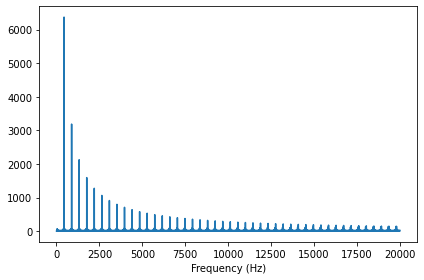

In [5]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

По сравнению с прямоугольной волной, sawtooth образный сигнал затухает аналогично, но включает в себя как четные, так и нечетные гармоники. 

пришлось сократить амплитуду прямоугольной волны, чтобы сделать их сопоставимыми.

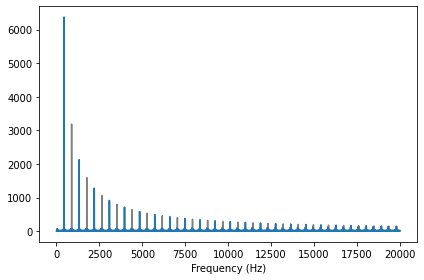

In [6]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

По сравнению с треугольной волной пилообразная волна падает не так быстро.

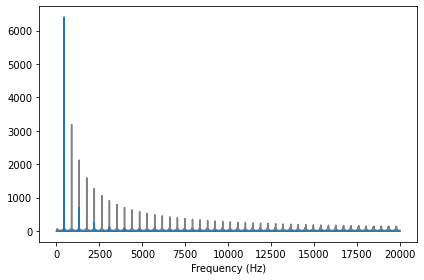

In [14]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

В частности, гармоники треугольной волны затухают пропорционально $1/f^2$, а пилообразные затухают как $1/f$.

### Exercise 2

Make a square signal at 1500 Hz and make a wave that samples it
at 10000 frames per second.  If you plot the spectrum, you can
see that most of the harmonics are aliased.
When you listen to the wave, can you hear the aliased harmonics? 

### Solution

Прямоугольная волна:

In [7]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

Спектр прямоугольной волны:

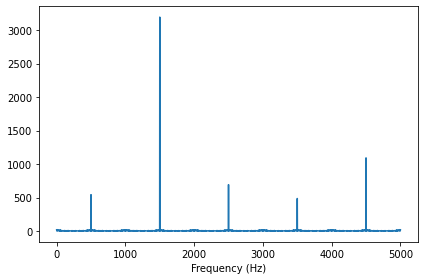

In [8]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Основная частота - на частоте 1500 Гц и первую гармонику на частоте 4500 Гц, но вторая гармоника, которая должна быть на частоте 7500 Гц, сглажена до 2500 Гц.

Третья гармоника, которая должна быть на частоте 10 500 Гц, будет сглажена до -500 Гц, но она снова будет сглажена до 500 Гц.

А 4-я гармоника, которая должна быть на частоте 13500 Гц, заканчивается на частоте 3500 Гц.

Пятая гармоника, которая должна быть на частоте 16500 Гц, заканчивается на частоте 1500 Гц, поэтому она вносит свой вклад в основную гармонику.

Остальные гармоники перекрываются с теми, которые мы уже видели.

In [9]:
square.make_audio()

In [11]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

### Exercise 3

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

### Solution

Here's the triangle wave:

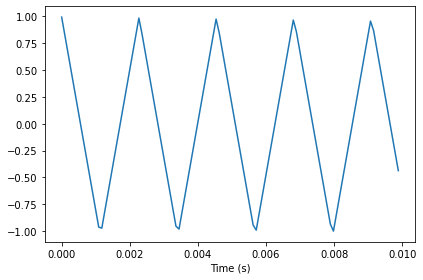

In [15]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

Первый элемент спектра представляет собой комплексное число, близкое к нулю

In [16]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Если мы добавим компонент с нулевой частотой, это приведет к добавлению к волне вертикального смещения.

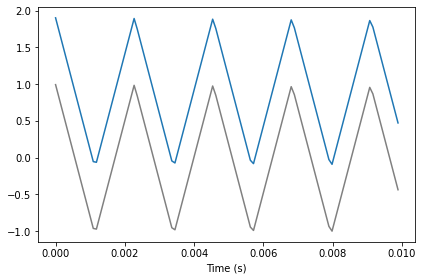

In [17]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Компонент нулевой частоты представляет собой сумму всех значений в сигнале, как мы увидим, когда углубимся в детали ДПФ. Если сигнал несмещен, компонент нулевой частоты равен 0. В контексте электрических сигналов термин нулевой частоты называется смещением постоянного тока; то есть смещение постоянного тока добавляется к сигналу переменного тока.

### Exercise 4

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

### Solution


In [18]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.
    
    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Треугольная волна:

In [19]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Вот как выглядят до и после.

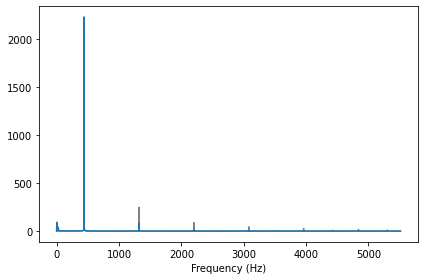

In [20]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот.

Вот как это звучит:

In [21]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольная волна теперь звучит почти как синусоида.

### Exercise 5

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

### Solution

Начнем с пилообразной волны, в которой есть все необходимые нам гармоники:

In [22]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

Вот как выглядит спектр. Гармоники падают как $1/f$.

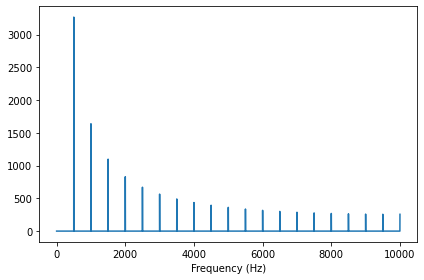

In [23]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Если мы применим фильтр, который мы написали в предыдущем упражнении, мы можем уменьшить гармоники как $1/f^2$.

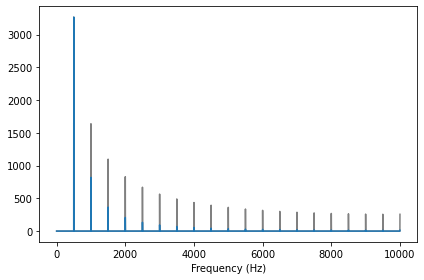

In [24]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Его звучание:

In [25]:
wave = spectrum.make_wave()
wave.make_audio()

Waveform сигнала:

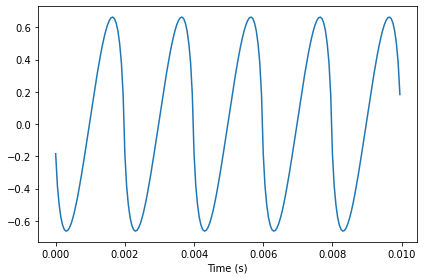

In [26]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

Другой подход заключается в суммировании серии косинусоидальных сигналов с правильными частотами и амплитудами.

In [27]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

Спектр сигнала:

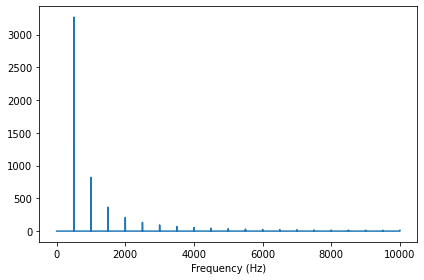

In [28]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Звучание сигнала:

In [29]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

Waveform сигнала:

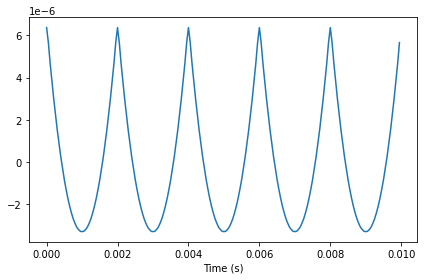

In [30]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

Очень похоже на параболический сигнал

In [31]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

Waveform параболического сигнала

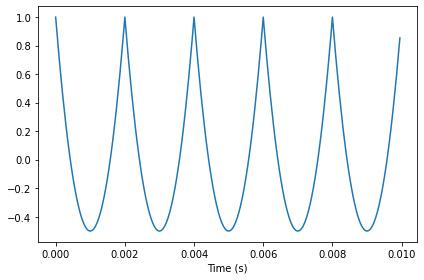

In [32]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

Параболический сигнал имеет четные и нечетные гармоники, которые падают как $1/f^2$:

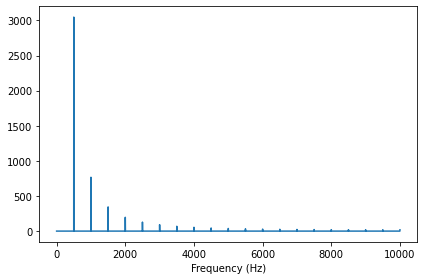

In [33]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')